In [ ]:
!gdown 1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0


Downloading...
From: https://drive.google.com/uc?id=1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 3.43MB/s]


In [ ]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  # **************** your code here ****************
  features_X = np.insert(features_X, 0, 1, axis=1)
  return features_X, sales_Y


In [ ]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [ ]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [ ]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):

  # **************** your code here ****************
    individual = [generate_random_value(bound) for _ in range(n)]
    return individual

In [ ]:
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [ ]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    # **************** your code here ****************
    fitness_value = 1/(1+loss)

    return fitness_value

In [ ]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [ ]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

   # **************** your code here ****************
    if random.random() < crossover_rate:
        crossover_point = random.randint(0, len(individual1)-1)

        individual1_new = individual1[:crossover_point] + individual2[crossover_point:]
        individual2_new = individual2[:crossover_point] + individual1[crossover_point:]

    return individual1_new, individual2_new

In [ ]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [4.09, 4.82, 3.1, -2.41]
individual2:  [3.44, 2.57, -0.79, 4.02]


In [ ]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    # **************** your code here ****************
    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()

    return individual_m

In [ ]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [ ]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [ ]:
population = initializePopulation(100)
print(len(population))

100


In [ ]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [ ]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-2.4524778348120444, -0.24347534660849046, -1.6280574153459049, -4.577648859932478]


In [ ]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
         # **************** your code here ****************
        individual_s = selection(sorted_population, m)

        # crossover
        # **************** your code here ****************
        individual_c1, individual_c2 = crossover(individual_s, sorted_population[random.randint(0, m-1)])
        # mutation
        # **************** your code here ****************
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)

        # add to new population
        new_population.append(individual_m1)
        # **************** your code here ****************

        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
         # **************** your code here ****************
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m-1])

In [ ]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [ ]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):

    # *********** your code here *************
    population, loss = create_new_population(population, elitism=2, gen=i)
    losses_list.append(loss)
  return losses_list


In [ ]:
losses_list = run_GA()


Best loss: 1644.8878769069752 with chromsome:  [4.5521868760175375, 0.2731406300843231, -0.6530068576755232, -1.1446858399240378]
Best loss: 1266.7701201008408 with chromsome:  [0.5023691487928006, 0.19794699840496754, -0.19994599838230487, -1.0669330777920283]
Best loss: 617.1656529788632 with chromsome:  [-3.865947189111064, -0.025770947393233268, -0.13859938079901046, 1.1020847852006332]
Best loss: 617.1656529788632 with chromsome:  [-3.865947189111064, -0.025770947393233268, -0.13859938079901046, 1.1020847852006332]
Best loss: 125.10169882119219 with chromsome:  [0.2733557109932283, 0.054398129552104546, -0.10343843938173891, 0.47716781341798686]
Best loss: 125.10169882119219 with chromsome:  [0.2733557109932283, 0.054398129552104546, -0.10343843938173891, 0.47716781341798686]
Best loss: 25.865558618507393 with chromsome:  [2.7196490335366343, 0.054398129552104546, -0.10343843938173891, 0.22731961146553736]
Best loss: 25.865558618507393 with chromsome:  [2.7196490335366343, 0.05439

Best loss: 1483.9109761765317 with chromsome:  [-2.1561779721322383, -0.09194837973176884, -1.387570224155903, 1.5364609498588744]
Best loss: 1483.9109761765317 with chromsome:  [-2.1561779721322383, -0.09194837973176884, -1.387570224155903, 1.5364609498588744]
Best loss: 1224.8805686704427 with chromsome:  [-0.5078083352938312, 0.29374112430097576, 0.9599734100161039, -0.9746692123387535]
Best loss: 788.6785758920352 with chromsome:  [0.5506463788607152, 0.14252282682060358, 0.756445093240079, 0.0321357774857467]
Best loss: 417.41334912356 with chromsome:  [4.407820767175531, 0.14252282682060358, -1.2175496832480803, 0.5541833575578947]
Best loss: 163.120292401013 with chromsome:  [-2.0227914373589515, -0.019651385947661026, 0.6546715813175974, 0.2407756706682873]
Best loss: 163.120292401013 with chromsome:  [-2.0227914373589515, -0.019651385947661026, 0.6546715813175974, 0.2407756706682873]
Best loss: 163.120292401013 with chromsome:  [-2.0227914373589515, -0.019651385947661026, 0.65

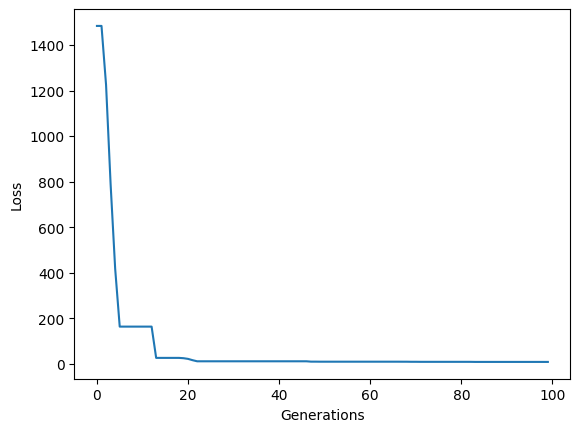

In [ ]:
def visualize_loss ( losses_list ) :
# *********** your code here *************
  plt.plot(losses_list)
  plt.xlabel('Generations')
  plt.ylabel('Loss')
  plt.show()
losses_list = run_GA ()
visualize_loss ( losses_list )

[2.7746435583966687, 0.14035467838271698, -0.37922557173930005, 1.343562920465169]


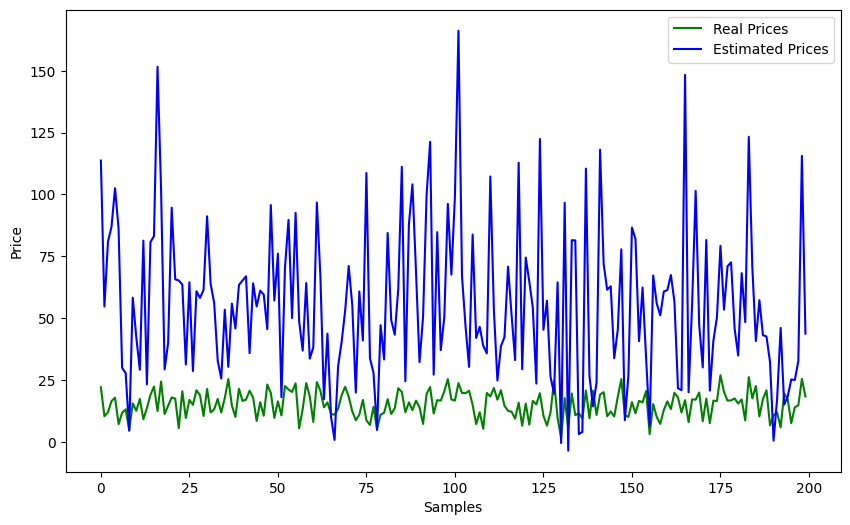

In [ ]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
     # ************* your code here *************
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[-1.4692891827648635, -0.4170567502126088, 1.318794317305464, 0.16124298167449536]


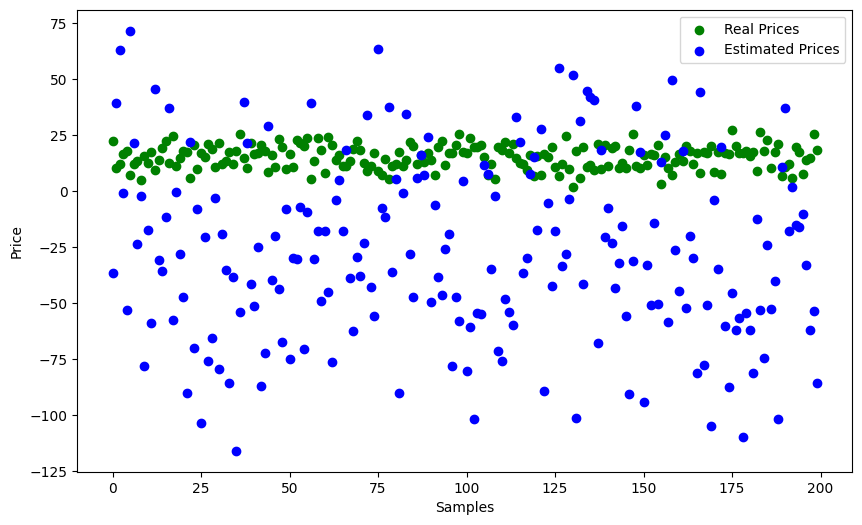

In [ ]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()